In [80]:
import pandas as pd
import numpy as np
from scipy. stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('habr_data_3.csv')

In [51]:
df.shape

(1000, 9)

In [49]:
df.head()

,item name,Время чтения,Сложность,Количество просмотров,В закладках,Комментарии,Автор,Рейтинг автора,Время публикации
0,Мультяшная графика продаётся лучше реалистично...,8,2,324,1,1,@Kallist,0.0,"2023-05-13, 19:20"
1,Picture in Picture Mode в android. Показываем ...,5,1,122,3,0,@cookie2727,0.0,"2023-05-13, 18:55"
2,"Много нас, а GPU один. Как делиться?",6,1,1600,5,6,@Antra,6.1,"2023-05-13, 17:57"
3,Ближайшие бесплатные мероприятия по разработке...,2,1,376,1,0,@ITMeeting,-0.8,"2023-05-13, 16:27"
4,Одноплатник Orange Pi 5 Plus: характеристики и...,4,",",3500,6,13,@Seleditor,49.0,"2023-05-13, 12:55"


Получим общее представление о наших данных: посмотрим на описательные статистики, поищем тенденции для некоторых колонок

In [50]:
df.describe().round(decimals=0)

,Время чтения,Количество просмотров,В закладках,Комментарии,Рейтинг автора
count,1000.0,1000.0,1000.0,1000.0,996.0
mean,9.0,5345.0,35.0,16.0,42.0
std,7.0,8175.0,37.0,40.0,87.0
min,1.0,122.0,0.0,0.0,-24.0
25%,5.0,1600.0,13.0,1.0,4.0
50%,7.0,2900.0,23.0,5.0,13.0
75%,10.0,5600.0,44.0,14.0,39.0
max,84.0,94000.0,322.0,703.0,657.0


In [68]:
df.describe(include='object')

,item name,Сложность,Автор,Время публикации
count,1000,1000,996,1000
unique,1000,4,706,971
top,Мультяшная графика продаётся лучше реалистично...,1,@MaxRokatansky,"2023-04-13, 13:41"
freq,1,370,27,2


In [52]:
df['Сложность'].value_counts()

1    370
,    314
2    280
3     36
Name: Сложность, dtype: int64

In [53]:
df['Автор'].value_counts().head()

@MaxRokatansky     27
@ph_piter          11
@ru_vds            11
@rikki_tikki        9
@dmitriizolotov     7
Name: Автор, dtype: int64

+ наглядно изобразим, как распределены данные, используя гистограммы

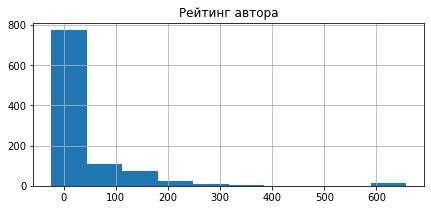

In [104]:
df['Рейтинг автора'].hist(figsize=(7, 3)).set_title('Рейтинг автора');

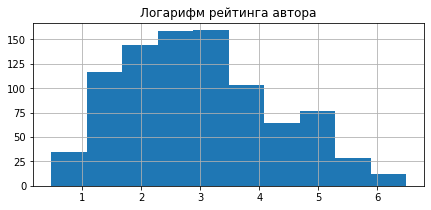

In [103]:
pos = df['Рейтинг автора'] > 0

df['Рейтинг автора'][(pos)].apply(lambda x: np.log(x + 1)).hist(figsize=(7, 3)).set_title('Логарифм рейтинга автора');

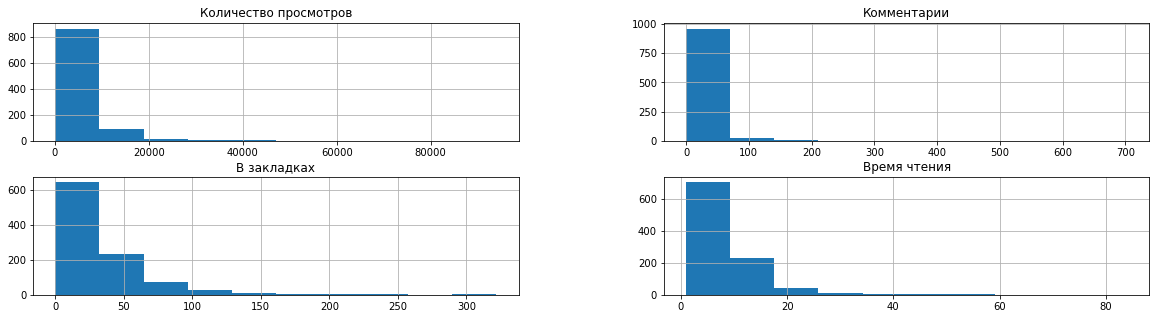

In [96]:
columns = ['Количество просмотров', 'Комментарии', 'В закладках', 'Время чтения']
df[columns].hist(figsize=(20, 5));

На следующих гистограммах видим, что распределение числа просмотров и сохранений близко к нормальному, время чтения также стремится к нормальному, хотя есть выбросы в виде очень больших значений времени чтения.

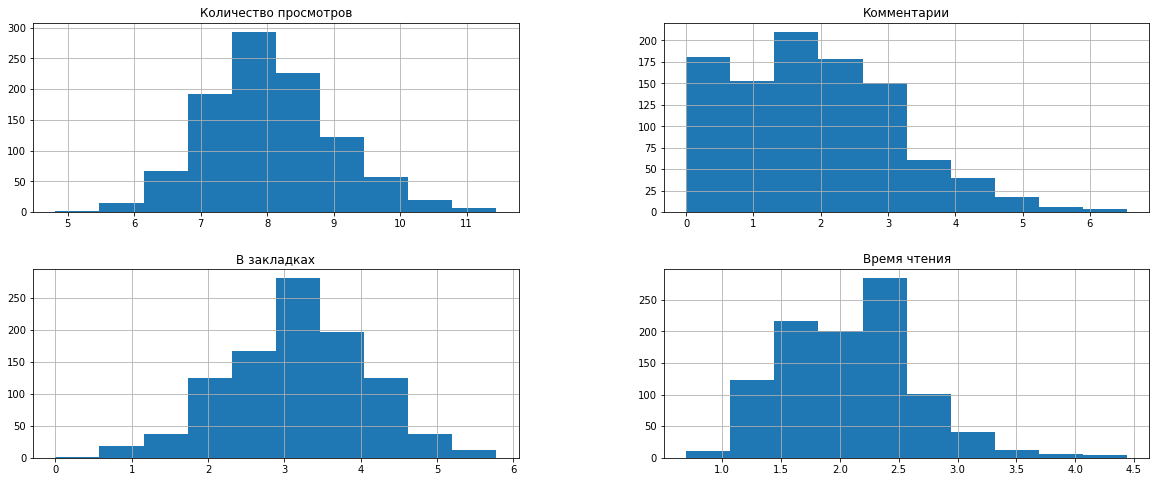

In [95]:
df[columns].apply(lambda x: np.log(x + 1)).hist(figsize=(20, 8));

Судя по графику ниже, на наших данных не получается отследить изменение в рейтинге автора во времени - взяли автора с наибольшим количеством постов в датасете. Очень маленький промежуток времени, и поэтому установить связи касательно переменных, влияющих на изменение рейтинга автора, не удается.

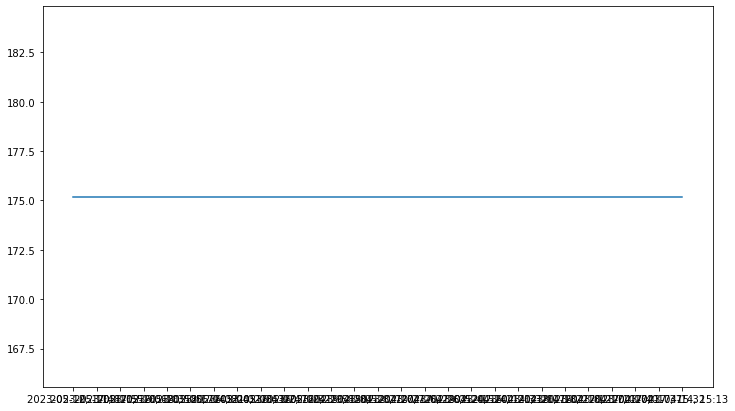

In [54]:
plt.figure(figsize=(12, 7))
x = df[(df['Автор'] == '@MaxRokatansky')]['Время публикации']
y = df[(df['Автор'] == '@MaxRokatansky')]['Рейтинг автора']
plt.plot(x, y)
plt.show()

  Определяем худших авторов, хд, а условия пока следующие:

In [69]:
cond1 = df['Рейтинг автора'] < df['Количество просмотров'].mean()
cond2 = df['Количество просмотров'] < df['Количество просмотров'].mean()
df[(cond1) & (cond2)].sort_values(by='Рейтинг автора', ascending=True).head()

,item name,Время чтения,Сложность,Количество просмотров,В закладках,Комментарии,Автор,Рейтинг автора,Время публикации
340,"Гипотеза Коллатца, часть 2",4,1,3100,6,102,@Martynov_M,-24.2,"2023-05-02, 23:58"
954,«DEEPFAKE» как программа для ЭВМ — искажения р...,6,1,769,2,0,@shushpanov_official,-19.0,"2023-04-14, 14:00"
302,Telegram Bot — ваш новый помощник,4,1,3800,24,1,@shushpanov_official,-19.0,"2023-05-03, 21:24"
901,Клонирование объектов JS,5,2,2800,46,26,@Usetech,-14.0,"2023-04-17, 08:14"
515,Чего ждать разработчикам от WWDC 2023?,3,",",1700,6,2,@Usetech,-14.0,"2023-04-27, 06:10"


In [71]:
df[(df['Автор'] == '@Martynov_M')]

,item name,Время чтения,Сложность,Количество просмотров,В закладках,Комментарии,Автор,Рейтинг автора,Время публикации
340,"Гипотеза Коллатца, часть 2",4,1,3100,6,102,@Martynov_M,-24.2,"2023-05-02, 23:58"
435,"Гипотеза Коллатца, часть 1",5,1,6400,22,63,@Martynov_M,-24.2,"2023-04-28, 21:42"


    ** Для определения взаимосвязей опробуем визуализацию данных~ **

Нарисуем ящики с усами и посмотрим распределение некоторых наборов данных и наличие выбросов

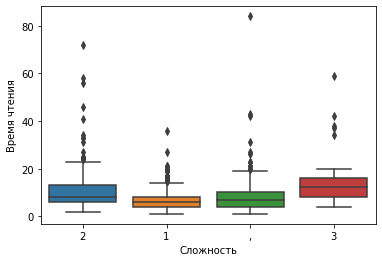

In [58]:
sns.boxplot(x=df['Сложность'], y=df['Время чтения'])
plt.xlabel('Сложность')
plt.ylabel('Время чтения');

Посмотрим на характер взаимосвязи некоторых признаков с помощью диаграмм рассеивания

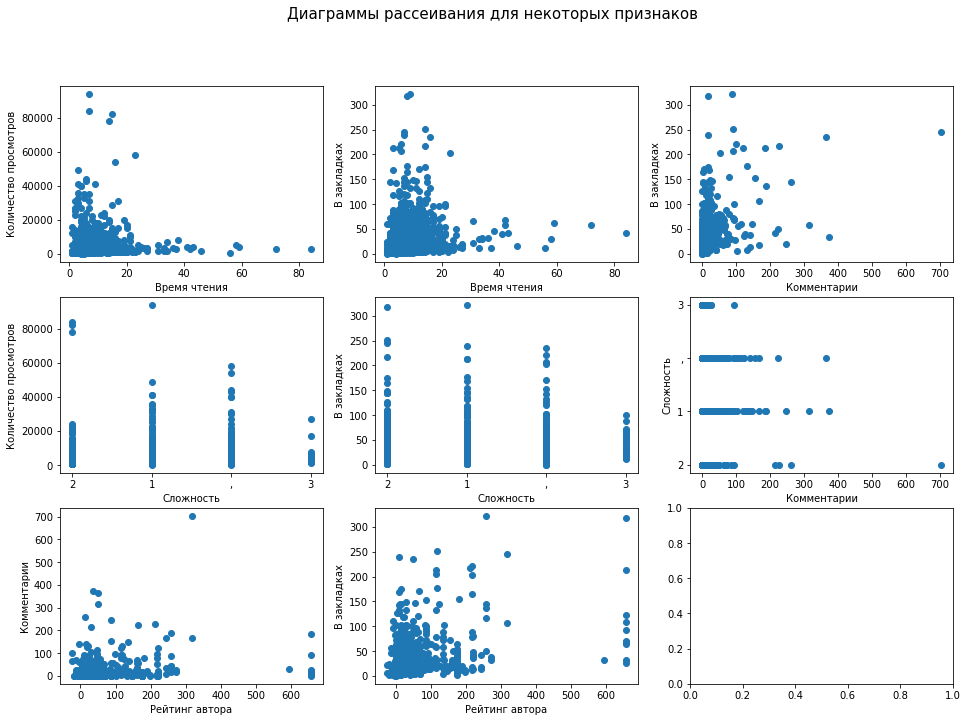

In [107]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 11))
fig.suptitle('Диаграммы рассеивания для некоторых признаков', fontsize=15)
axes[0, 0].scatter(df['Время чтения'], df['Количество просмотров'])
axes[0, 0].set_xlabel('Время чтения')
axes[0, 0].set_ylabel('Количество просмотров')

axes[0, 1].scatter(df['Время чтения'], df['В закладках'])
axes[0, 1].set_xlabel('Время чтения')
axes[0, 1].set_ylabel('В закладках')

axes[1, 0].scatter(df['Сложность'], df['Количество просмотров'])
axes[1, 0].set_xlabel('Сложность')
axes[1, 0].set_ylabel('Количество просмотров')

axes[1, 1].scatter(df['Сложность'], df['В закладках'])
axes[1, 1].set_xlabel('Сложность')
axes[1, 1].set_ylabel('В закладках')

axes[0, 2].scatter(df['Комментарии'], df['В закладках'])
axes[0, 2].set_xlabel('Комментарии')
axes[0, 2].set_ylabel('В закладках')

axes[1, 2].scatter(df['Комментарии'], df['Сложность'])
axes[1, 2].set_xlabel('Комментарии')
axes[1, 2].set_ylabel('Сложность')

axes[2, 0].scatter(df['Рейтинг автора'], df['Комментарии'])
axes[2, 0].set_xlabel('Рейтинг автора')
axes[2, 0].set_ylabel('Комментарии')

axes[2, 1].scatter(df['Рейтинг автора'], df['В закладках'])
axes[2, 1].set_xlabel('Рейтинг автора')
axes[2, 1].set_ylabel('В закладках')

plt.show()

Наглядно узнаем и сравним численные значения корреляций, а также выясним, какие переменные имеют сильную корреляцию, с помощью HeatMap

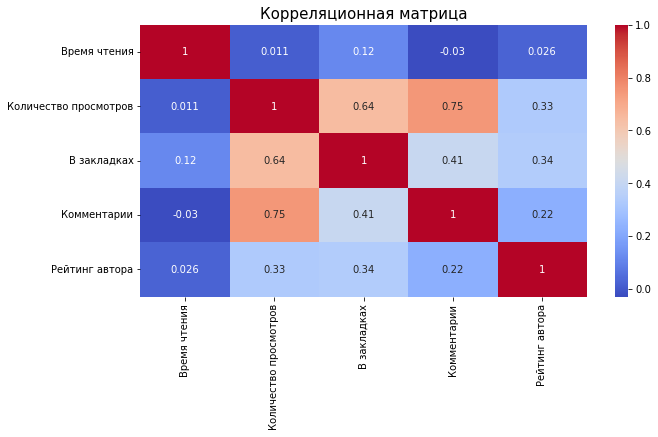

In [60]:
corr = df.corr()

plt.figure(figsize=(10,5))
plt.title('Корреляционная матрица', fontsize=15)
corrvis = sns.heatmap(corr, annot=True, cmap='coolwarm')

Видно, что наибольшую положительную корреляцию имеют количество просмотров и комментариев, а также просмотров и сохранений, что логично. Все это показатели активности/популярности статьи. Пока что слабая корреляция прослеживается между рейтингом автора и просмотрами/закладками/комментами (активностью). Возможно, автор не так важен для активности, как и время чтения. Осталось проверить, как влияет сложность.

Также можно сделать предположения о том, как показатели активности влияют друг на друга: на количество просмотров могут влиять выраженная в сохранениях полезность статьи, побуждающая делиться постом. А если количество просмотров неслабо связано с комментариями, значит, на хабре сидят очень активные и любящие обсуждение пользователи, что похоже на правду~

Мы ещё подумаем над тем, как заполнить пропуски в "Сложности", чтобы пробовать рассчитать взаимосвязи с этим признаком; пока посмотрим остальные тенденции